<a href="https://colab.research.google.com/github/jazaineam1/Andes_ADDBD/blob/main/Sesion7/M3%20Clase%204%20-%20Missing%20Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Análisis de Datos y Big data***

## ***Universidad de los Andes***
>## **Dirección de Educación Continua.**
>>## **Formación de habilidades escenciales.**

![Imágen1](https://github.com/jazaineam1/Andes_ADDBD/blob/main/Imagenes/Presentaci%C3%B3n-removebg-preview.png?raw=true)
### Clase 7 - Práctica Missing & Outliers

**Ver la presentación a continuación [acá](https://github.com/jazaineam1/Andes_ADDBD/raw/main/Sesion7/2024%2003%2020%20Clase%208%20-%20Calidad%20de%20los%20datos.pdf)**

Objetivo: Aprender técnicas para el tratamiento de outliers y missing en una base de datos.

In [1]:
a=[1,2,1,1.5,0.3,0.5,10]
sum(a)/len(a)

2.3285714285714287

In [2]:
import numpy as np
a=[1,2,1,1.5,0.3,0.5,7]
print("el promedio es: ",np.mean(a))
print("la mediana  es: ",np.median(a))

el promedio es:  1.9000000000000001
la mediana  es:  1.0


**Librerias**

In [3]:
%%capture
pip install missingno

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno # Nueva librería para nuestros análisis de missing.

## Visualización y Análisis de Datos atípicos

Trabajaremos con una base de datos de calificaciones de Kaggle. Exploremos las variables disponibles:

https://www.kaggle.com/datasets/desalegngeb/students-exam-scores

In [5]:
# Cargue de la base de datos
df = pd.read_csv(r'https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion7/Original_data_with_more_rows.csv')

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
# Visualizamos los 5 primeros registros
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
# ¿Cuál es la dimensión de la base de datos? Tip: .shape
df.shape


(30641, 8)

**Con las medidas de tendencia central podemos identificar si existen datos atípicos:**

In [9]:
df.describe()

,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000
mean,66.777651,69.624980,68.468327
std,16.117647,14.671572,15.307814
min,-5.000000,10.000000,5.000000
25%,56.000000,60.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,78.000000,80.000000,79.000000
max,1000.000000,100.000000,100.000000


**Preguntas**

- ¿En cuál variable existe una diferencia significativa del promedio con relación a la mediana?
- ¿Qué nos dice la desviación estándar?

**También, podemos identificar datos atípicos mediante visualizaciones:**

Text(0.5, 1.0, 'Puntuación de Matematicas vs Puntuación de Escritura')

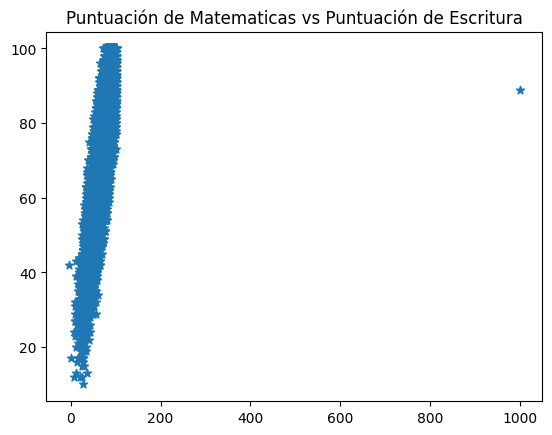

In [10]:
fig, ax = plt.subplots()
ax.scatter(df['MathScore'], df['ReadingScore'], marker = "*")
plt.title('Puntuación de Matematicas vs Puntuación de Escritura')

Text(0.5, 1.0, 'Histograma - Puntuación de Matemáticas')

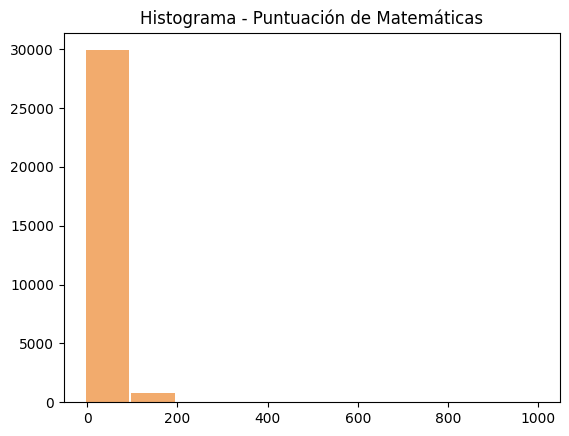

In [11]:
plt.hist(x=df['MathScore'],  color='#F2AB6D', rwidth=0.95)
plt.title('Histograma - Puntuación de Matemáticas')

**¿Existen calificaciones de 1000 en matemáticas? No es lógico. Para seguir una regla "de negocio", vamos a excluir el o los datos superiores a 100 y veamos cómo cambia el gráfico.**

Es importante considerar que no estamos eliminando los datos atípicos, es necesario entender su naturaleza. Determinar si son errores o no. Eliminarlos es una decisión que requiere mayor análisis, evidencia o referencia en alguna regla de negocio.

In [12]:
df2 = df[df['MathScore']<=100]

In [43]:
df2.shape

(30639, 8)

Text(0.5, 1.0, 'Puntuación de Matemáticas vs Puntuación de Escritura')

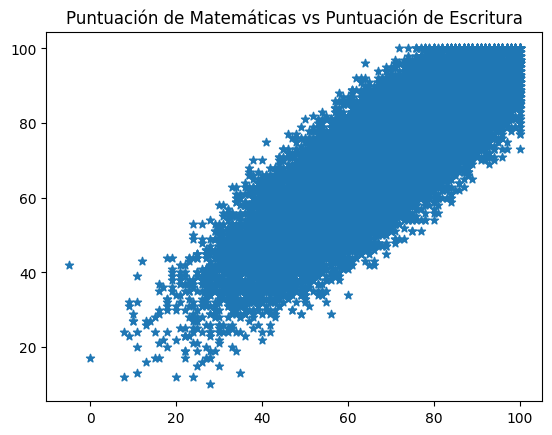

In [13]:
fig, ax = plt.subplots()
ax.scatter(df2['MathScore'], df2['ReadingScore'], marker = "*")
plt.title('Puntuación de Matemáticas vs Puntuación de Escritura')

Text(0.5, 1.0, 'Histograma - Puntuación de Matemáticas')

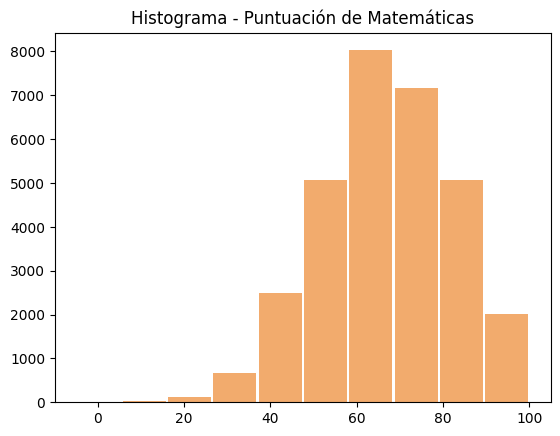

In [14]:
plt.hist(x=df2['MathScore'],  color='#F2AB6D', rwidth=0.95)
plt.title('Histograma - Puntuación de Matemáticas')

**Además, existe un dato negativo. En el contexto de una calificación final la nota minima es 0. Por lo que, procederemos a excluir datos negativos**

In [15]:
df2 = df2[df2['MathScore']>=0]

Text(0.5, 1.0, 'Puntuación de Matematicas vs Puntuación de Escritura')

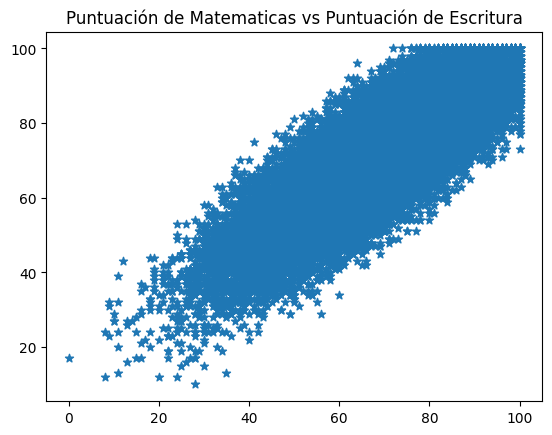

In [16]:
fig, ax = plt.subplots()
ax.scatter(df2['MathScore'], df2['ReadingScore'], marker = "*")
plt.title('Puntuación de Matematicas vs Puntuación de Escritura')

**Ahora, ¿usted visualiza más datos atípicos? Un estudiante con 0 en mátematicas y casi 20 en escritura, ¿lo considera atípico?**

**- Veámoslo, con gráficos de boxplot (Metodología de Tukey) y con la base inicial.**

<Axes: ylabel='MathScore'>

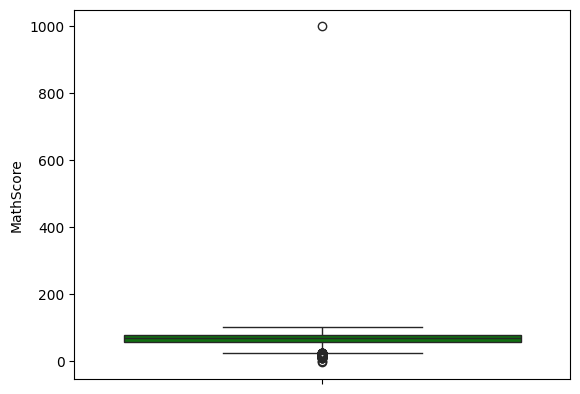

In [17]:
sns.boxplot(y = "MathScore", data = df, color = "green")

**Excluyamos los datos atípicos de la variable Puntuación de Matemáticas, con esta metodología:**

In [18]:
# Encontramos el Q1, Q3, y el rango intercuartílico para cada columna
Q1 = df['MathScore'].quantile(q=.25)
Q3 = df['MathScore'].quantile(q=.75)
IQR = Q3 - Q1 # Es lo mismo que Q3 - Q1
# Solo mantenemos filas que esten dentro de 1.5*IQR de Q1 y Q3
df_sin_outliers = df[~((df['MathScore'] < (Q1-1.5*IQR)) | (df['MathScore'] > (Q3+1.5*IQR)))]
# ¿Cuál es la dimensión de nuestra base final?
df_sin_outliers.shape

(30566, 8)

**Así, nos quedó la distribución de la variable:**

Text(0.5, 1.0, 'Boxplot - Puntuación de Matemáticas')

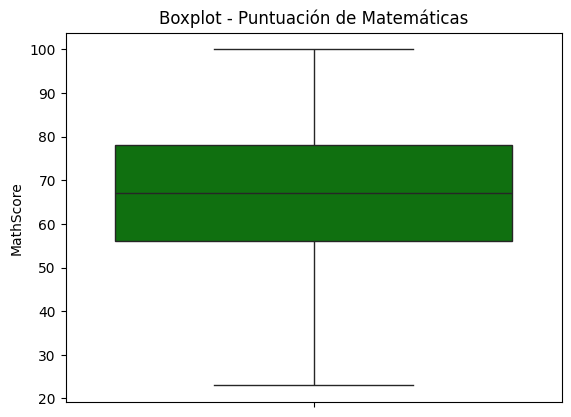

In [19]:
sns.boxplot(y = "MathScore", data = df_sin_outliers, color = "green")
plt.title('Boxplot - Puntuación de Matemáticas')

Text(0.5, 1.0, 'Histograma - Puntuación de Matemáticas')

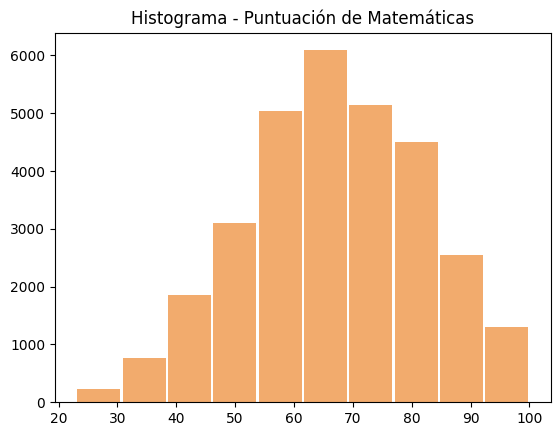

In [20]:
plt.hist(x=df_sin_outliers['MathScore'],  color='#F2AB6D', rwidth=0.95)
plt.title('Histograma - Puntuación de Matemáticas')

**Con este código, podríamos hacerlo para toda la base de datos. Pueden explorarlo y ver que resultado obtienen.**

```
# Encontramos el Q1, Q3, y el rango intercuartílico para cada columna
Q1 = df['MathScore'].quantile(q=.25)
Q3 = df['MathScore'].quantile(q=.75)
IQR = Q3 - Q1 # Es lo mismo que Q3 - Q1
# Solo mantenemos filas que esten dentro de 1.5*IQR de Q1 y Q3
df_sin_outliers = df[~((df['MathScore'] < (Q1-1.5*IQR)) | (df['MathScore'] > (Q3+1.5*IQR)))]
# ¿Cuál es la dimensión de nuestra base final?
df_sin_outliers.shape
```

In [50]:
# Encontramos el Q1, Q3, y el rango intercuartílico para cada columna
Q1 = df['MathScore'].quantile(q=.25)
Q3 = df['MathScore'].quantile(q=.75)
IQR = Q3 - Q1 # Es lo mismo que Q3 - Q1
# Solo mantenemos filas que esten dentro de 1.5*IQR de Q1 y Q3
df_sin_outliers = df[~((df['MathScore'] < (Q1-1.5*IQR)) | (df['MathScore'] > (Q3+1.5*IQR)))]
# ¿Cuál es la dimensión de nuestra base final?
df_sin_outliers.shape

(30566, 8)

**Para resumir:**

1.  ¿Por qué observamos estos datos?​
    ¿Es un tema de limitación en la medición? ​
        (El sensor de medición se vuelve loco cuando llueve)​
2. ¿Es un tema de de una observación válida pero sistemáticamente diferente a las demás? ​
        (Este punto está muy cerca de un punto de actividad volcánica)​
3. ¿Se trata de un patrón sistemático presente en otros estudios?
        (El valor de los ingresos del percentil superior de la población)
        
**En el ejemplo, identificamos como datos atípicos notas superiores a 100 e inferiores a 0. A estos valores, tambien podemos decidir asignarles un nuevo valor con las metodologías que abordaremos en el cuaderno para el tratamiento de missing.**

**Es posible que el valor no sea un atípico, como es el caso de la nota 0, pero puede que este teniendo un impacto significativo en el análisis. Podemos observar cómo se comportan los datos sin esta observación, para tener claro cómo cambia la distribución y si la conclusión que damos como respuesta a la pregunta de negocio se afecta**

**Es posible que nuestro interés de análisis sea, justamente, el comportamiento de un subconjunto de datos que no siguen una regla de negocio. ¿Por qué no siguen la regla? ¿Siguen algún patrón en particular?**

## Visualización de Missing y Tratamientos

Ahora vamos a utilizar una tabla de datos que contienen, las mismas calificaciones, pero con características familiares de los estudiantes, para explorar datos faltantes.

In [53]:
# Cargue de la base de datos
# Al cargar la base de datos, tenga en cuenta el separador. En este caso es ; y si lo hacemos por default no funciona.
df_missing = pd.read_csv(r'https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion7/Expanded_data_with_more_features.csv', sep = ';')

In [54]:
df_missing

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,group E,associate's degree,free/reduced,none,single,regularly,yes,0.0,school_bus,< 5,74.0,77,68
1,0,male,group D,some college,free/reduced,completed,married,sometimes,yes,0.0,school_bus,5 - 10,45.0,48,53
2,0,male,group E,master's degree,standard,completed,married,never,yes,0.0,school_bus,< 5,69.0,62,67
3,0,female,group C,some college,standard,none,divorced,never,yes,0.0,private,5 - 10,72.0,86,82
4,0,male,group E,high school,free/reduced,none,married,regularly,yes,0.0,private,5 - 10,52.0,62,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,999,female,group A,high school,standard,none,married,sometimes,no,4.0,school_bus,5 - 10,43.0,47,39
30637,999,male,group C,bachelor's degree,standard,completed,married,sometimes,no,5.0,private,< 5,81.0,76,80
30638,999,female,group B,associate's degree,standard,NaN,single,never,yes,5.0,private,5 - 10,77.0,85,86
30639,999,male,NaN,some high school,free/reduced,completed,married,regularly,yes,5.0,school_bus,5 - 10,79.0,79,79


In [56]:
# Visualización de los últimos 5 registros
df_missing.tail(1)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
30640,999,male,group C,high school,standard,none,married,regularly,yes,NaN,school_bus,< 5,66.0,63,57


**¿Cuántos datos nulos tenemos y en cuáles variables?**

In [57]:
df_missing.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore              4194
ReadingScore              0
WritingScore              0
dtype: int64

**Visualización de missing**

Text(0.5, 1.0, 'Missing de la base de datos')

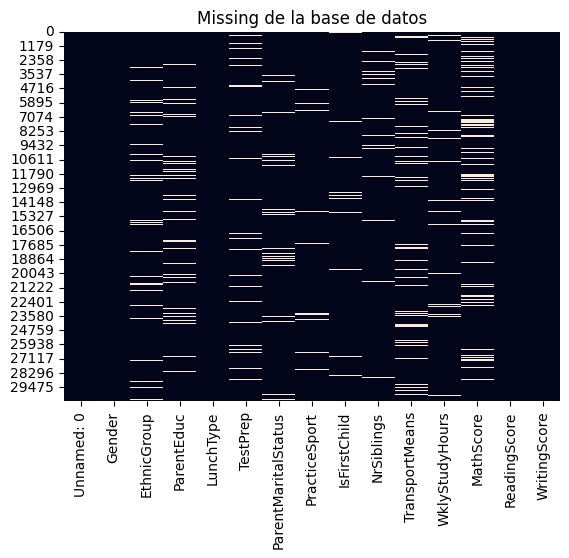

In [24]:
#Aquí estamos usando dos librerías de visualización simultaneamente
sns.heatmap(df_missing.isnull(), cbar=False)
plt.title("Missing de la base de datos")
# El eje Y es el índice y en el eje X se encuentran las variables.

**Otras formas de visualizarlos (Para explorar...)**

```
    msno.matrix(df_missing)
    plt.title('Matriz de missing')

    msno.bar(df_missing)
    plt.title('Datos completos')
```

Text(0.5, 1.0, 'Datos completos')

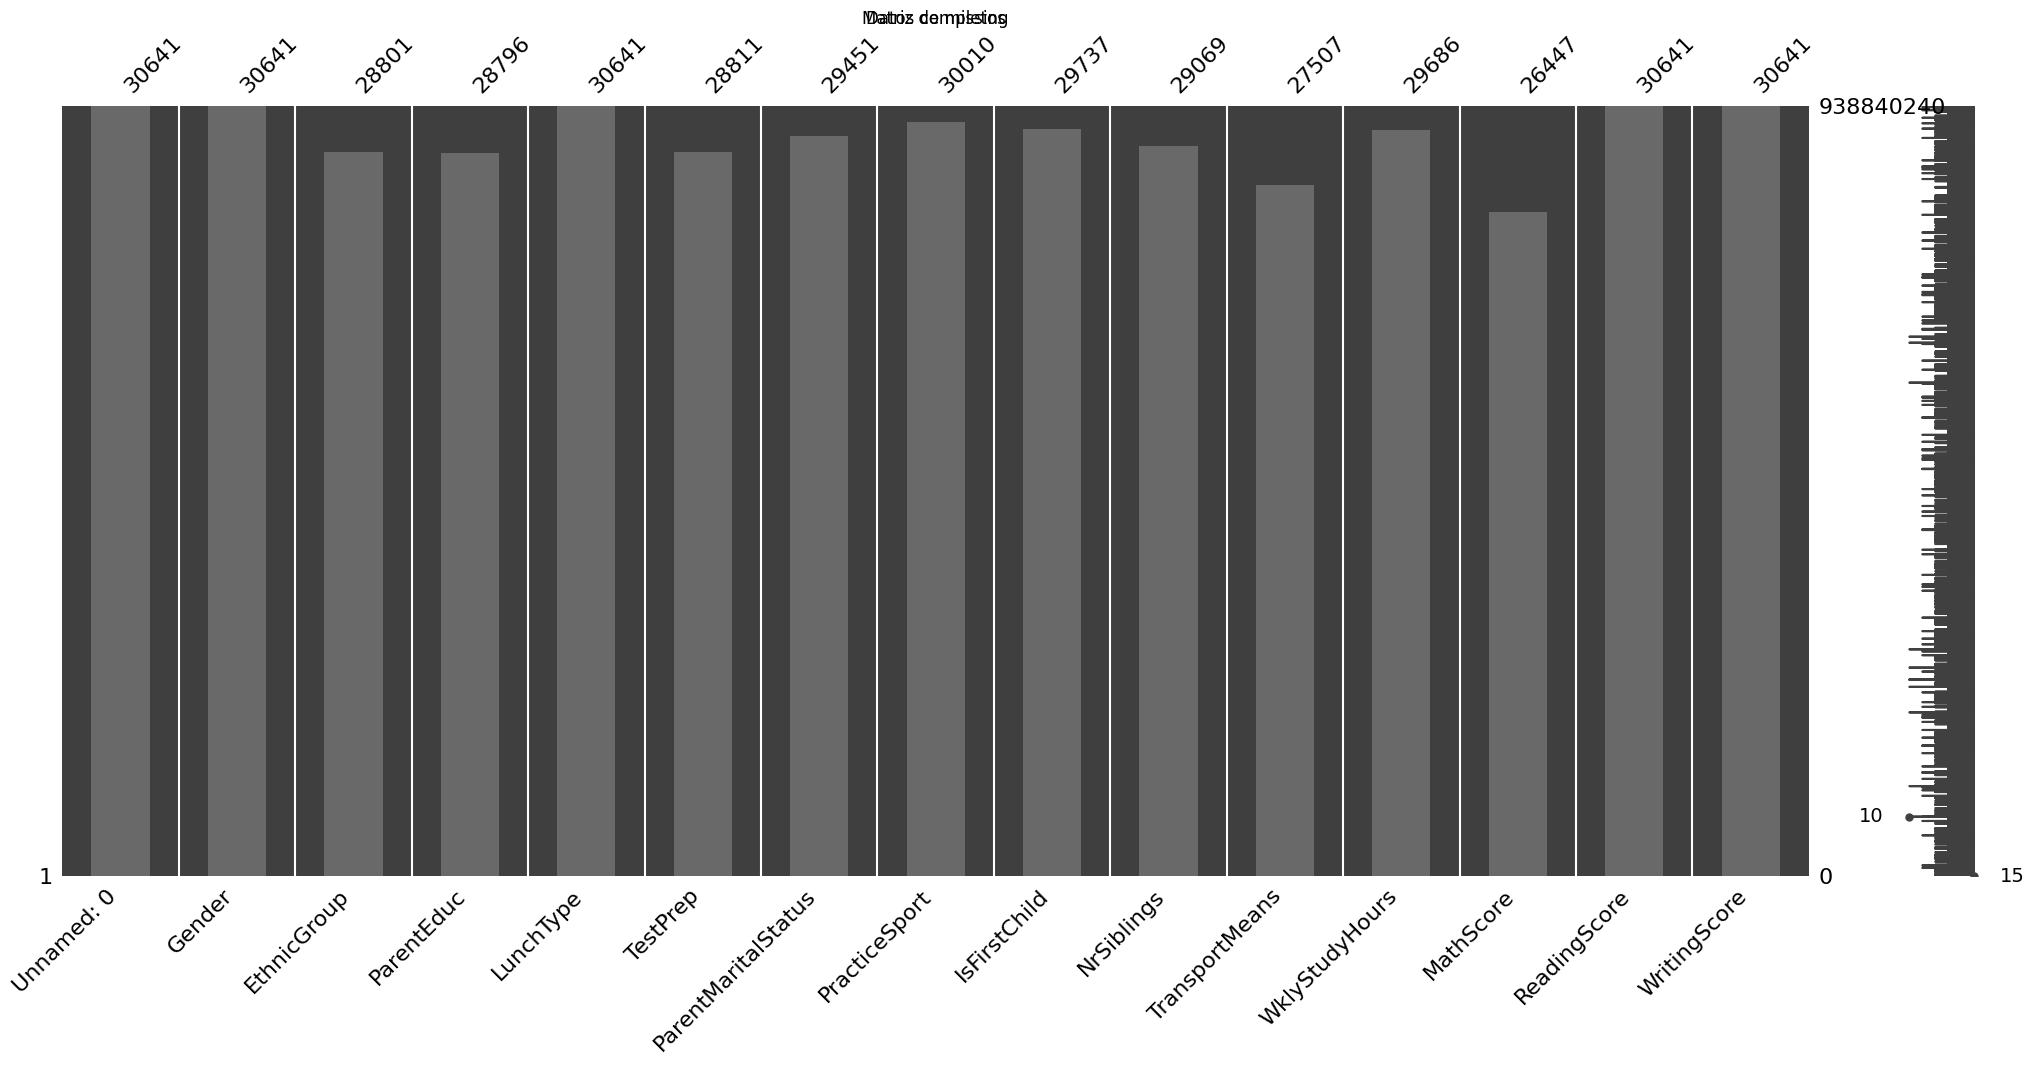

In [58]:
msno.matrix(df_missing)
plt.title('Matriz de missing')

msno.bar(df_missing)
plt.title('Datos completos')

### Tratamientos

**1. Usar datos que tienen las filas completas.**

    Esto sólo es apropiado cuando tenemos valores faltantes completamente aleatorios. De lo contrario podemos introducir sesgos.
    
    Otra desventaja: cuando eliminamos una fila entera porque le falta un dato en una columna, desechamos información valiosa en otras columnas.

In [59]:
# Eliminamos las filas con missing
df1_miss= df_missing.dropna(subset=['MathScore', 'EthnicGroup'])

print("valores faltantes en la puntuación de matemáticas: " +
      str(df1_miss['MathScore'].isnull().sum()))
print("valores faltantes en el grupo etnico: " +
      str(df1_miss['EthnicGroup'].isnull().sum()))

valores faltantes en la puntuación de matemáticas: 0
valores faltantes en el grupo etnico: 0


In [60]:
# Comparemos las dimensiones de las bases de datos
df_missing.shape,df1_miss.shape

((30641, 15), (25193, 15))

**2. Rellenamos los valores faltantes con el promedio de los datos para esa columna para variables númericas. Variables categóricas utilizamos la moda.**

    También, sólo es apropiado cuando tenemos valores faltantes completamente aleatorios. De lo contrario podemos introducir sesgos.

    No estamos incorporando incertidumbre de no observar los datos en las observaciones. Sólamente ponemos el (único valor) promedio de la columna.

In [61]:
# Datos nulos
df_missing['MathScore'].isnull().sum()

4194

In [62]:
# Hacemos una copia de la base de datos
df2_miss = df_missing.copy()
# Imputamos los datos con la media
df2_miss['MathScore'] = df2_miss['MathScore'].fillna(round(df2_miss['MathScore'].mean()))
print("valores faltantes en la puntuación de matemáticas: " + str(df2_miss['MathScore'].isnull().sum()))

valores faltantes en la puntuación de matemáticas: 0


¿Porqué redondeamos el puntaje?

In [29]:
# Imputamos la variable grupo étnico con la moda
df2_miss['EthnicGroup'].fillna((df2_miss['EthnicGroup'].mode()[0]), inplace = True)
print("valores perdidos en el grupo étnico: " + str(df2_miss['EthnicGroup'].isnull().sum()))

valores perdidos en el grupo étnico: 0


¿Porqúe utilizamos [0] este parámetro despues de la moda?

In [63]:
# Comparemos las dimensiones de las bases de datos
df_missing.shape,df2_miss.shape

((30641, 15), (30641, 15))

In [64]:
df_missing.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,26447.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.527092,69.377533,68.418622
std,288.747894,1.458242,15.392749,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [32]:
df2_miss.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.591821,69.377533,68.418622
std,288.747894,1.458242,14.301443,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,58.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,76.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


Observemos el cambio que existe en la desviación estándar entre ambas versiones.

Así es, la dimensión de la base no cambio porque imputamos los datos.

**3. Uso de modelos predictivos para estimar missing**

Para esto vamos a utilizar la librería sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

El KNNImputer predice el valor de un valor faltante al observar tendencias en columnas relacionadas. A continuación, elige el valor de mejor ajuste basado en el algoritmo k-vecinos más cercanos.

In [33]:
from IPython import display  # Cargue de las imagenes

![Imágen1](https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion7/Imputaci%C3%B3n.png)

In [34]:
# Cargamos la librería
from sklearn.impute import KNNImputer # Nueva librería para imputar datos

# Construcción del modelo (Que será estudiado con detalle en el módulo 4 de este curso)
imputacion = KNNImputer(n_neighbors=5)


In [35]:
# Copia a nuestra base de datos
df_missing3 = df_missing.copy()
# Imputación de los missing a partir de las variables
imputacion.fit(df_missing3[["MathScore"]])

KNNImputer()

In [65]:
# Reemplazamos la variable con los valores imputados
df_missing3["MathScore"] = np.round((imputacion.transform(df_missing3[["MathScore"]]).ravel()))

In [66]:
print("Valores perdidos en la puntuación de matemáticas: " +
      str(df_missing3['MathScore'].isnull().sum()))

Valores perdidos en la puntuación de matemáticas: 0


--

**Comparemos, los dos métodos de imputación utilizados**

1. Identifiquemos los registros nulos en la base de datos inicial.

In [38]:
df_missing[df_missing['MathScore'].isna()].index

Index([   13,    31,    35,    39,    44,    47,    52,    53,    72,    90,
       ...
       30538, 30564, 30568, 30578, 30579, 30600, 30609, 30613, 30622, 30625],
      dtype='int64', length=4194)

2. El código anterior, nos muestra los índices con missing. Ahora podremos filtrar por índices.

In [39]:
#Filtro por el índice 0 para probar:

df_missing.loc[0]['MathScore'], df2_miss.loc[0]['MathScore'], df_missing3.loc[0]['MathScore']

(74.0, 74.0, 74.0)

In [67]:
#Filtro por el índice 13 para validar:

df_missing.loc[13]['MathScore'], df2_miss.loc[13]['MathScore'], df_missing3.loc[13]['MathScore']

(nan, 67.0, 67.0)

In [41]:
#Filtro por el índice 72 para validar:

df_missing.loc[72]['MathScore'], df2_miss.loc[72]['MathScore'], df_missing3.loc[72]['MathScore']

(nan, 67.0, 67.0)

In [42]:
#Filtro por el índice 30613 para validar:

df_missing.loc[30613]['MathScore'], df2_miss.loc[30613]['MathScore'], df_missing3.loc[30613]['MathScore']

(nan, 67.0, 67.0)

**Para practicar....**

- Busque una base en Kaggle con datos faltantes, analicela y aplique en ella la técnica que considere pertinente.